<a href="https://colab.research.google.com/github/John-Akech/Height_weight_Simple_linear_Regreaaion/blob/master/Height_weight_Simple_linear_Regreaaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import the necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [35]:
# load the dataset
df = pd.read_csv('/content/height-weight.csv')

In [36]:
# Explore the data
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [37]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [38]:
df.shape

(23, 2)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [40]:
df.isnull().sum()

,0
Weight,0
Height,0


In [41]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


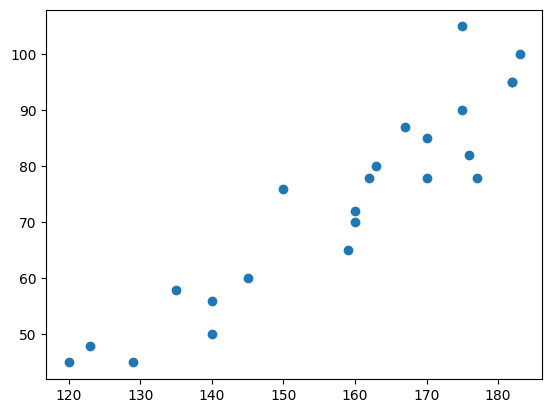

In [42]:
# plot the data
plt.scatter(df['Height'], df['Weight'])

In [43]:
# Split the data into independent and dependent data
X = df['Weight']
y= df['Height']

In [44]:
# split the data into train, test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scalar.transform(X_test.values.reshape(-1, 1))

In [46]:
# Train the model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

LinearRegression()

In [47]:
# Print the coefficients and intercepts
print('Coefficients:', lin_model.coef_)
print('Intercept:', lin_model.intercept_)

Coefficients: [17.03440872]
Intercept: 157.5


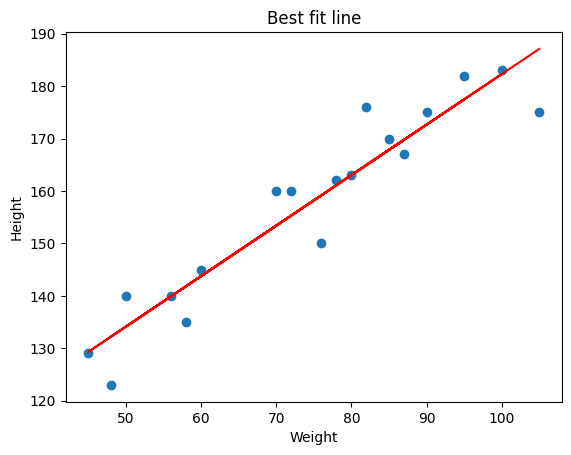

In [48]:
# Plot best fir line
plt.scatter(X_train, y_train)
plt.plot(X_train, lin_model.predict(X_train_scaled), color='red')
plt.title('Best fit line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [49]:
# Execute the prediction
y_pred_test = lin_model.predict(X_test_scaled)

In [50]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

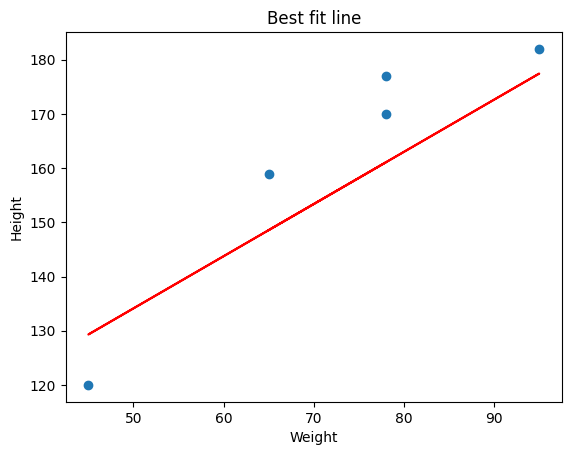

In [51]:
# Plot
plt.scatter(X_test, y_test)
plt.plot(X_test, lin_model.predict(X_test_scaled),color='red')
plt.title('Best fit line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [52]:
# Execute performance metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

In [53]:
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081
R-squared: 0.776986986042344


In [54]:
# New weight = 80
scaled_weight = scalar.transform([[80]])

In [55]:
scaled_weight

array([[0.32350772]])

In [56]:
lin_model.predict(scaled_weight)

array([163.01076266])

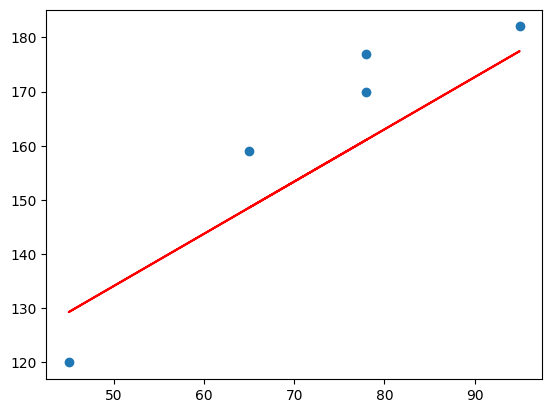

In [57]:
# Plot scatter for prediction
plt.scatter(X_test, y_test)
plt.plot(X_test, lin_model.predict(X_test_scaled),color='red')

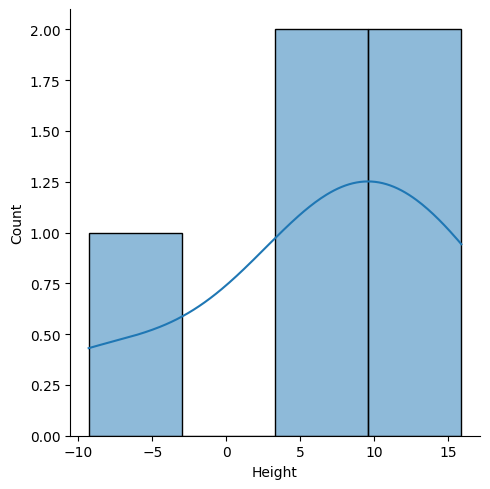

In [60]:
# Plot displot for residual
residuals = y_test - y_pred_test
sns.displot(residuals, kde=True)

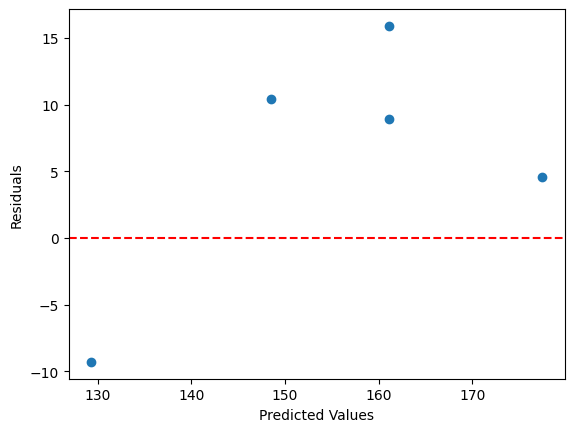

In [61]:
# Plot scatter for prediction and residuals
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()